<a href="https://colab.research.google.com/github/Draks187/Carbon_Emission_Prediction_AICTE/blob/main/Carbon_Emission_Prediction(Week3_Data_Buliding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import feature_selection as fs
import numpy.random as nr

In [5]:
# Import the Cleaned Dataset from a CSV File
data = pd.read_csv(r'/content/drive/MyDrive/data_cleaned.csv')
data.head()

,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_cap,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop
0,AGO,1991,417.4,5.449515,179.271884,565.451027,4367.397,0.409949,129.971142,15.290728,12.399822,1.219375e+10,820.0,239.1,3.034866,10653515.0,6.687032,4.099473e+06
1,ARE,1991,1594.0,0.076475,245.977706,12262.388130,57010.849,29.851550,598.807980,26.377204,0.266886,3.391964e+10,19340.0,20.5,5.442852,1909812.0,5.265704,1.507988e+06
2,ARG,1991,2666.1,1.285579,173.122857,1434.960601,117021.304,3.536073,426.614517,39.119646,4.772468,1.897200e+11,3960.0,25.8,1.372593,33093579.0,1.762636,2.890393e+07
3,AUS,1991,1603.3,1.306912,208.686644,4926.727783,281530.258,16.288490,689.948873,60.356798,7.915273,3.299655e+11,18380.0,8.6,1.274577,17284000.0,1.438378,1.478473e+07
4,AUT,1991,5463.0,0.209142,128.939160,3381.073790,65888.656,8.448456,322.186648,19.746121,20.991143,1.721664e+11,21200.0,8.9,1.134999,7798899.0,1.134999,5.131676e+06


In [6]:
# Define a Random State Number for All Random State - Ensures Reproducibility of All Results
random_state_num = 0

In [7]:
# Overview of the Available Data
print("Shape of the dataset:")
data.shape

Shape of the dataset:


(1700, 18)

In [8]:
print("available columns and their data types:")
data.dtypes

available columns and their data types:


,0
country,object
year,int64
cereal_yield,float64
fdi_perc_gdp,float64
en_per_gdp,float64
en_per_cap,float64
co2_ttl,float64
co2_per_cap,float64
co2_per_gdp,float64
pop_urb_aggl_perc,float64


In [9]:
# Remove the ARE Outliers
data = data[data['country']!='ARE']

# Print Shape after Removing the Outliers
print("Shape of the dataset after removing the ARE outliers:")
data.shape

Shape of the dataset after removing the ARE outliers:


(1686, 18)

In [10]:
# Choose Features and Label Columns
feature_cols = ['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap',
                'pop_urb_aggl_perc', 'prot_area_perc', 'pop_growth_perc', 'urb_pop_growth_perc']
label_col = ['co2_per_cap']

# Convert into nympy arrays (required for scikit-learn models)
features = np.array(data[feature_cols])
labels =  np.array(data[label_col])

In [11]:
features

array([[4.17400000e+02, 5.44951458e+00, 8.20000000e+02, ...,
        1.23998220e+01, 3.03486601e+00, 6.68703163e+00],
       [2.66610000e+03, 1.28557882e+00, 3.96000000e+03, ...,
        4.77246763e+00, 1.37259322e+00, 1.76263616e+00],
       [1.60330000e+03, 1.30691206e+00, 1.83800000e+04, ...,
        7.91527300e+00, 1.27457750e+00, 1.43837778e+00],
       ...,
       [4.05530000e+03, 3.50366162e+00, 5.86000000e+03, ...,
        6.85955008e+00, 1.10405722e+00, 1.89744981e+00],
       [7.71500000e+02, 1.47989700e+01, 1.60000000e+02, ...,
        9.98656658e+00, 2.76328559e+00, 4.60583400e+00],
       [2.14400000e+03, 6.41099075e+00, 9.70000000e+02, ...,
        3.59830177e+01, 2.65395608e+00, 3.04999620e+00]])

In [12]:
# Split into Training and Testing Subsets
nr.seed(1)
features_train, features_test, labels_train, labels_test = train_test_split(features,
                                                                            labels,
                                                                            test_size=0.2,
                                                                            random_state=random_state_num)

In [13]:
# Set Folds for Cross Validation for the Feature Selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the Model
rf_selector = RandomForestRegressor(random_state=random_state_num)

# Define an Objects for a Model for Recursive Feature Elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = rf_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(features_train, np.ravel(labels_train))

selector.support_
print("Feature ranking after RFECV:")
print(selector.ranking_)

# Print the Important Features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature_cols,ranks_transform) if j==1]
print("Chosen important features:")
print(chosen_features)

Feature ranking after RFECV:
[1 2 1 1 1 1 1 1]
Chosen important features:
['cereal_yield', 'gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc', 'prot_area_perc', 'pop_growth_perc', 'urb_pop_growth_perc']


In [14]:
# Reduce Features
features_train_reduced = selector.transform(features_train)
features_test_reduced = selector.transform(features_test)

print("Training subset shape before the recursive feature elimination: ",features_train.shape)
print("Training subset array shape after the recursive feature elimination: ", features_train_reduced.shape)
print("Test subset array shape after the recursive feature elimination: ",features_test_reduced.shape)


Training subset shape before the recursive feature elimination:  (1348, 8)
Training subset array shape after the recursive feature elimination:  (1348, 7)
Test subset array shape after the recursive feature elimination:  (338, 7)


In [15]:
# Define Value Ranges for Each Hyperparameter
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Keep the Rest Unchanged
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

# Create the Hyperparameter Grid
param_grid = {
    'n_estimators': n_estimators,
    'max_features': ['sqrt', 'log2', None] ,
    'max_depth': max_depth,
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [16]:
# Define the Cross-Validation Folds for the Hyperparameter Tuning
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define the Random Forest Regressor Model Object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform a Randomized Search on the Grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

In [17]:
# Fit the Grid Search Model Object with Cross-Validation on the Data
rf_model.fit(features_train_reduced, np.ravel(labels_train))

# Corrected Variable Name
print("Best Parameters:", rf_model.best_params_)

Best Parameters: {'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [18]:
# Pick the Model with the Best Hyperparameter Combination for Further Analysis
rf_best_model = rf_model.best_estimator_


In [19]:
# Define the Cross-Validation Folds for the Evaluation
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the Model on the Training Subset with Cross-Validation
nr.seed(1)
cv_eval = cross_val_score(rf_best_model, features_train_reduced, labels_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# Print the R2 Score for Each Fold
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

Mean R2 score of all CV folds = 0.986
Standard deviation of the R2 score over all folds = 0.004
R2 score for each fold:
Fold  1    0.981
Fold  2    0.979
Fold  3    0.990
Fold  4    0.987
Fold  5    0.985
Fold  6    0.993
Fold  7    0.989
Fold  8    0.982
Fold  9    0.992
Fold 10    0.986


In [20]:
# make predictions from the features of the testing subset
predictions = rf_best_model.predict(features_test_reduced)

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=labels_test, y_pred=predictions)
mse = mean_squared_error(y_true=labels_test, y_pred=predictions)
rmse = np.sqrt(mse)

print(f"R2 = {r2}, Mean Squared Error (MSE) = {mse}, Root Mean Squared Error (RMSE) = {rmse}")

R2 = 0.9834303770922288, Mean Squared Error (MSE) = 0.31131625203288366, Root Mean Squared Error (RMSE) = 0.5579572134428263


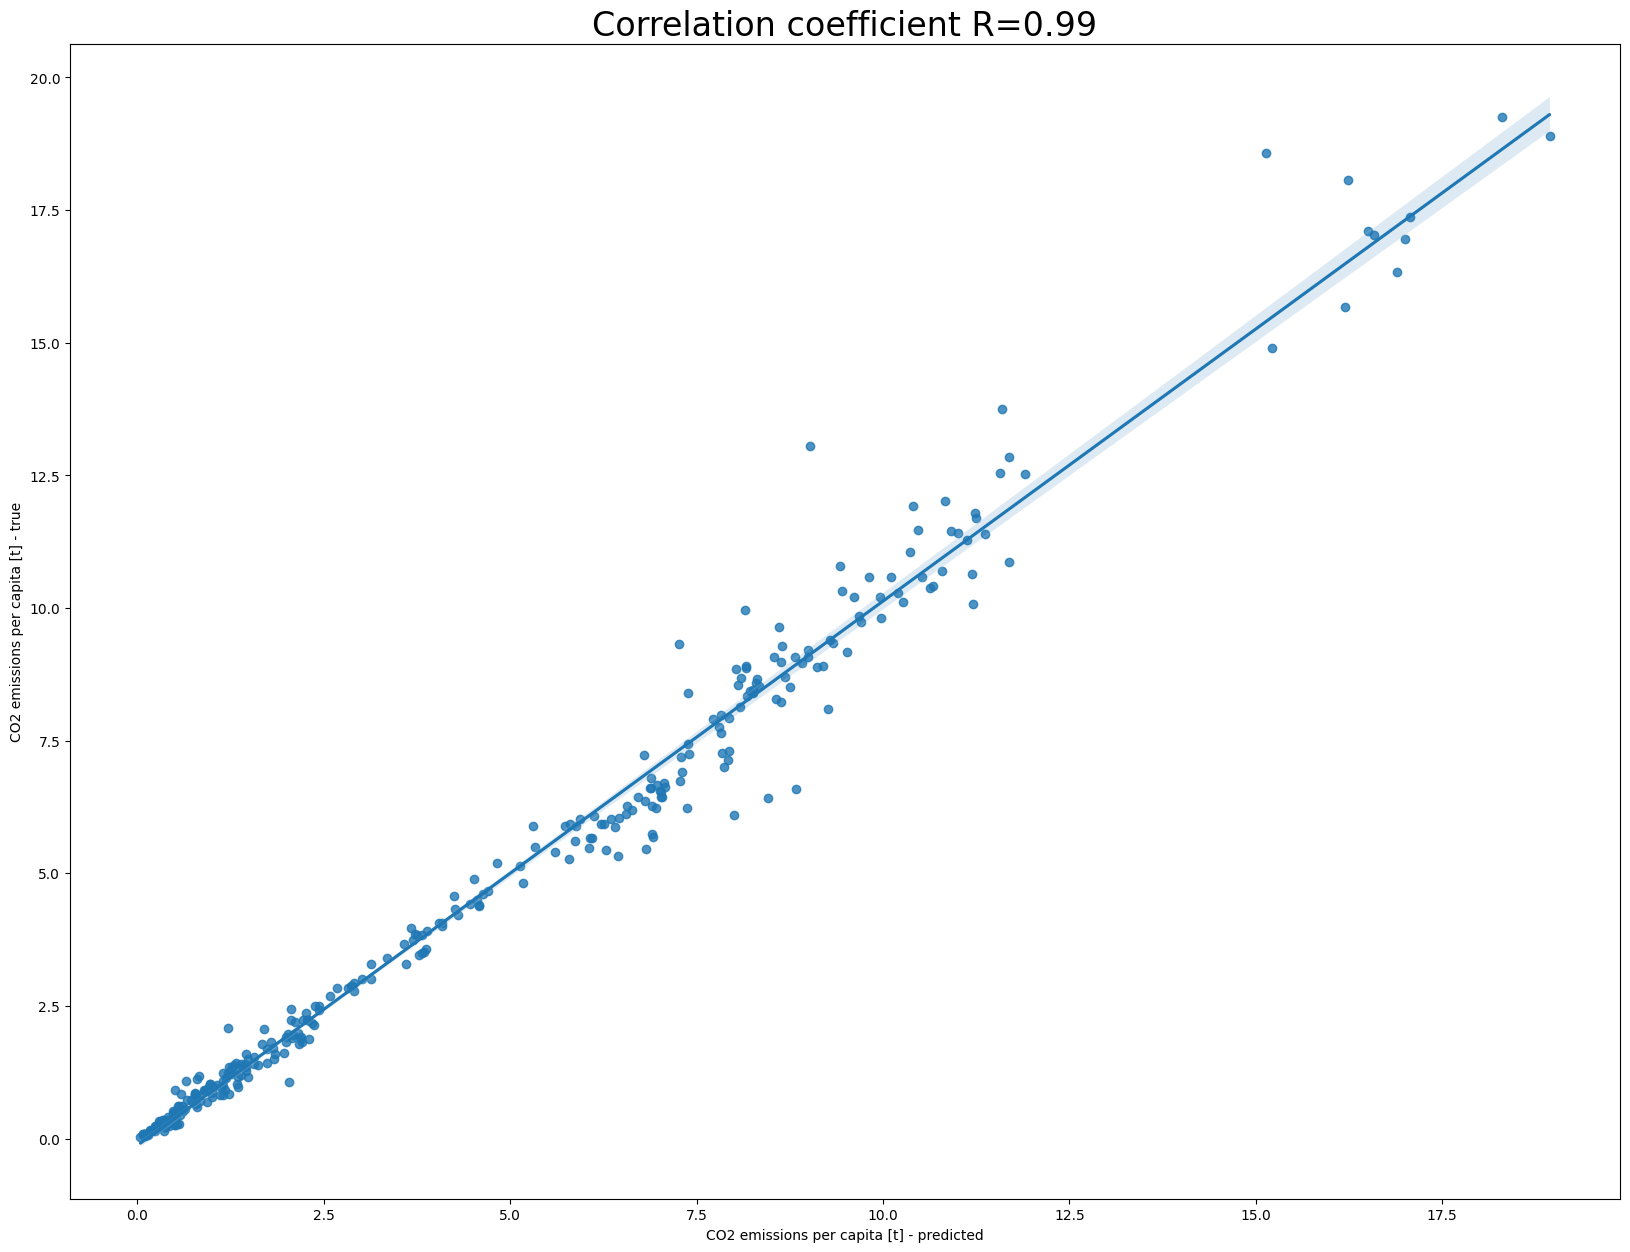

In [21]:
import seaborn as sns
# Plot Predicted vs True Values of the Test Subset

f,ax=plt.subplots(figsize=(20,15))
sns.set_theme(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(labels_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(labels_test)[0,:])[0,1],2)))
plt.show()

In [22]:
import joblib
# Save the Trained Model to File
joblib.dump(rf_best_model, 'forecasting_co2_emmision.pkl')
print("Model saved to 'forecasting_co2_emmision.pkl")

Model saved to 'forecasting_co2_emmision.pkl


In [23]:
# Load Model From File
loaded_model = joblib.load('forecasting_co2_emmision.pkl')
print("📂 Model loaded successfully.")

📂 Model loaded successfully.


In [24]:
# List of Selected Features
selected_features = ['cereal_yield', 'gni_per_cap', 'en_per_cap',
                     'pop_urb_aggl_perc', 'prot_area_perc',
                     'pop_growth_perc', 'urb_pop_growth_perc']

In [25]:
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']

# Filter the dataset to include only the selected countries
df_filtered = data[data['country'].isin(selected_countries)]

# Dictionary to store the growth rates for each country
growth_rates = {}

# Loop over each selected country
for country in selected_countries:
    # Get data for the current country and sort it by year
    country_data = data[(data['country'] == country)].sort_values('year')

    # Identify the start and end year for the country
    start_year = country_data['year'].min()
    end_year = country_data['year'].max()
    years = end_year - start_year  # Total number of years between start and end

    # Dictionary to store growth rates of all features for the current country
    country_growth = {}

    # Skip this country if the time span is not valid (e.g., only one year of data)
    if years <= 0:
        print(f"Skipping {country} due to insufficient year range.")
        continue

    # Loop through each selected feature
    for feature in selected_features:
        # Get the feature value in the start year
        start_value = country_data[country_data['year'] == start_year][feature].values
        # Get the feature value in the end year
        end_value = country_data[country_data['year'] == end_year][feature].values

        # Skip if either value is missing
        if len(start_value) == 0 or len(end_value) == 0:
            continue

        # Extract scalar values from arrays
        start_value = start_value[0]
        end_value = end_value[0]

        # Skip if values are non-positive or not finite (e.g., NaN, inf)
        if start_value <= 0 or end_value <= 0 or not np.isfinite(start_value) or not np.isfinite(end_value):
            continue

        # Compute the Compound Annual Growth Rate (CAGR)
        cagr = (end_value / start_value) ** (1 / years) - 1
        # Store the result in the country-specific dictionary
        country_growth[feature] = cagr

    # Save the growth rates of all features for the current country
    growth_rates[country] = country_growth

In [26]:
# Display the calculated growth rates in a readable format
print("\nGrowth Rates (CAGR) from {} to {}:\n".format(start_year, end_year))

# Loop through each country and its corresponding growth rate dictionary
for country, features in growth_rates.items():
    print(f"{country}")  # Print the country name with an icon

    # Loop through each feature and its CAGR value
    for feature, rate in features.items():
        # Determine whether to display a plus or minus sign
        sign = '+' if rate >= 0 else '−'

        # Print the feature name and its growth rate percentage (formatted to two decimal places)
        print(f"  • {feature}: {sign}{abs(rate * 100):.2f}%")

    # Add a line break between countries for readability
    print()


Growth Rates (CAGR) from 1991 to 2008:

IND
  • cereal_yield: +1.94%
  • gni_per_cap: +6.85%
  • en_per_cap: +2.12%
  • pop_urb_aggl_perc: +1.26%
  • prot_area_perc: +0.35%
  • pop_growth_perc: −2.28%
  • urb_pop_growth_perc: −1.26%

USA
  • cereal_yield: +2.28%
  • gni_per_cap: +4.26%
  • en_per_cap: −0.12%
  • pop_urb_aggl_perc: +0.40%
  • prot_area_perc: +0.01%
  • pop_growth_perc: −2.16%
  • urb_pop_growth_perc: −2.15%

PAK
  • cereal_yield: +2.29%
  • gni_per_cap: +5.00%
  • en_per_cap: +1.50%
  • pop_urb_aggl_perc: +0.84%
  • prot_area_perc: +0.01%
  • pop_growth_perc: −2.46%
  • urb_pop_growth_perc: −1.01%

RUS
  • cereal_yield: +1.99%
  • gni_per_cap: +7.41%
  • en_per_cap: −0.61%
  • pop_urb_aggl_perc: +0.48%
  • prot_area_perc: +0.46%

NZL
  • cereal_yield: +1.96%
  • gni_per_cap: +5.00%
  • en_per_cap: +0.39%
  • pop_urb_aggl_perc: +1.15%
  • prot_area_perc: +0.17%
  • pop_growth_perc: −2.04%
  • urb_pop_growth_perc: −1.83%



In [27]:
# Define the range of years to forecast (next 20 years beyond the last available year)
last_year = data['year'].max()
future_years = list(range(last_year + 1, last_year + 21))

In [28]:
# Initialize a list to store forecasted results
forecast_results = []

# Loop through each selected country for prediction
for country in selected_countries:
    country_data = data[(data['country'] == country)].sort_values('year')

    # Skip countries with missing feature values
    if country_data[selected_features].dropna().empty:
        print(f"Skipping {country} due to missing values.")
        continue

    # Take the latest complete record (most recent year) for the country
    latest_row = country_data[selected_features].dropna().iloc[-1].copy()

    # Forecast for each year into the future
    for year in future_years:
        # Apply the previously calculated CAGR to each feature
        for feature in selected_features:
            growth_rate = growth_rates.get(country, {}).get(feature, 0.0)
            latest_row[feature] *= (1 + growth_rate)

        # Use trained model to predict CO₂ emissions per capita
        input_features = latest_row.values.reshape(1, -1)
        predicted_co2 = loaded_model.predict(input_features)[0]

        # Store the forecast result
        forecast_results.append({
            'country': country,
            'year': year,
            'co2_percap': predicted_co2
        })

📈 Forecasted CO₂ Emissions per Capita (Next 20 Years)


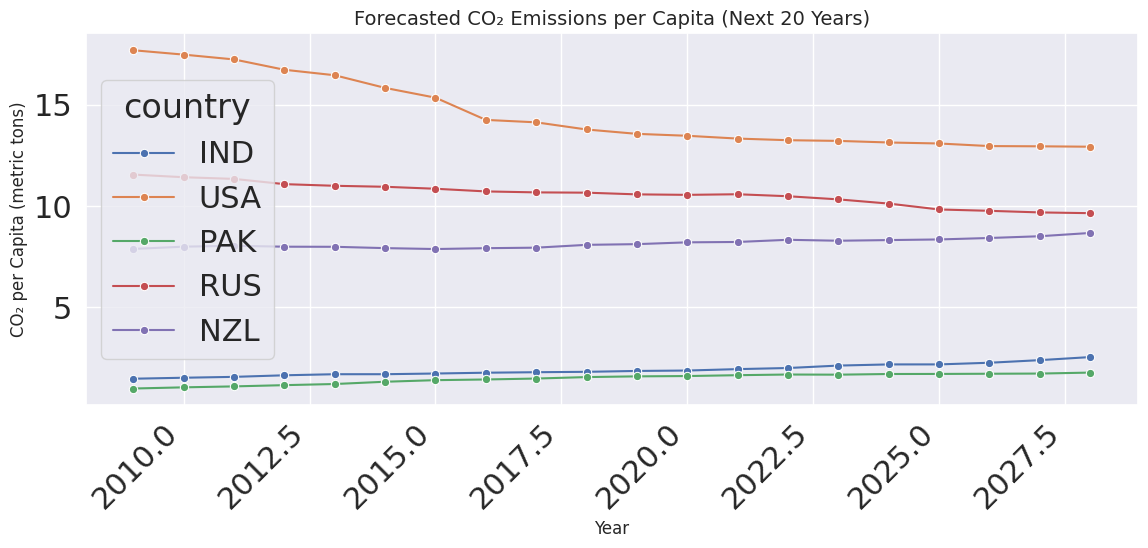


📊 Forecasted CO₂ per Capita for Last 5 Years in Forecast Period (India):

   country  year  co2_percap
15     IND  2024    2.194268
16     IND  2025    2.194939
17     IND  2026    2.276336
18     IND  2027    2.404601
19     IND  2028    2.555710


In [29]:
# Convert the list of predictions into a DataFrame
df_forecast = pd.DataFrame(forecast_results)

# Plot forecasted CO₂ per capita for all countries over the next 20 years
print('📈 Forecasted CO₂ Emissions per Capita (Next 20 Years)')
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_forecast, x='year', y='co2_percap', hue='country', marker='o')
plt.title('Forecasted CO₂ Emissions per Capita (Next 20 Years)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('CO₂ per Capita (metric tons)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the forecast values for the last 5 years for India
print("\n📊 Forecasted CO₂ per Capita for Last 5 Years in Forecast Period (India):\n")
print(df_forecast[df_forecast['country'] == 'IND'].sort_values(by='year').tail(5))